# Computing Page Factors Analytically using the Geometric Optics Approximation


In [2]:
from IPython import get_ipython
get_ipython().magic('reset -sf') 

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_12015/3019614859.py:2: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  get_ipython().magic('reset -sf')


In [42]:
dm_dof = 7e41
textsize = 20
legendsize = 15 

#LOOK INTO SCENARIO WHERE WE CAN ADD CHARGED DM 

## Defining Particle Masses in GeV ## 
ms = [None]*17
ms[0] = 4.18  # bottom quark
ms[1] = 1.27  # charm quark
ms[2] = 4.7e-3  #down quark
ms[3] = 0.5109989461e-3  #electron
ms[4] = 200.e-3  #gluons, effective mass
ms[5] = 125.03  #Higgs boson
ms[6] = 105.6583745e-3  #muon
ms[7] = 0.0  #neutrinos
ms[8] = 0.0  #photon
ms[9] = 96e-3  #strange quark
ms[10] = 1.77686  #tau
ms[11] = 173.21  #top quark
ms[12] = 2.2e-3  #up quark
ms[13] = 80.403  #W boson
ms[14] = 91.1876  #Z boson
ms[15] = 0.0  #graviton
ms[16] = 0  # Dark Matter, 1e-3 = 1 MeV

In [9]:
## All Definitions for notebook below ## 

import numpy as np
import os 
Mp = 1.22e19
G = 1/Mp**2
c = 1 
h = 1 
grav = 1 # Graviton = 0 or 1, change to include its contribution into the SM


def rplusC(M,Q):
    return M*(1+ np.sqrt(1 - float(Q)**2))
    
def rminusC(M,Q):
    return M*(1- np.sqrt(1 - float(Q)**2))

def BH_TempC(M,Q): 

    return 1/2/np.pi/G*(rplusC(M,Q) - rminusC(M,Q))/(4*np.pi*rplusC(M,Q)**2)

def greybody(M,E):
    # result = 27*M**2*E**2*G*2/(h**2*c**6) # Symbolic Expression

    # Expression below in planck units, M is in GeV, E is in GeV
    return 27*G**2*(M)**2*(E)**2 

def dNdtdE(M,Q,E,s):
    if s == 0 or s == 1/2 or s == 1 or s == 2:
        return 1/2/np.pi *greybody(M,E)/(np.exp(E/BH_TempC(M,Q)) -(-1)**(2*s))
    else:
        print('Error, Wrong Spin Value')
        return None


def nb_spin_0(E, ms):
    result = 0 
    if E > ms[5]:
    	result += 1 # Higgs 1 Helicity state
    if E > ms[16]:
    	result += dm_dof
    return result

def nb_spin_1(E,ms):
	#  This function computes the number of spin 1 dof.

	result = 2	#  photon contribution (2 helicity states)  # Massless, spinless dark sector contribution
	if E > ms[13]:  #  W+- boson contribution
		result += 6.0   #  W+- bosons (2 particle species)*(3 helicity states)

	if E > ms[14]:  #  Z0 boson contribution
		result += 3.0   #  Z0 boson (3 helicity states)
	
	if E > ms[4]:  #  gluons contribution
		result += 16.0   #  gluons (8 particle species)*(2 helicity states)
	
	return result  


def nb_spin_2(E, ms): 
	#  This function computes the number of spin 2 dof.
	result = grav*2   #  graviton (2 polarization states)

	return result  


def nb_spin_05(E, ms): 
	#  This function computes the number of spin 1/2 dof.
	
	result = 6.0   #  neutrinos (3 particle species)*(1 helicity state)*

	
	if E > ms[0]:  #  bottom quark contribution
		result += 12   #  bottom quark (2 helicity states)*(3 color states)*
	
	if E > ms[1]:  #  charm quark contribution
		result += 12   #  charm quark (2 helicity states)*(3 color states)*
	
	if E > ms[2]:  #  down quark contribution
		result += 12   #  down quark (2 helicity states)*(3 color states)*
	
	if E > ms[3]:  #  electron contribution
		result += 4   #  electrons (2 helicity states)*
	
	if E > ms[6]:  #  muon contribution
		result += 4   #  muon (2 helicity states)*
	
	if E > ms[9]:  #  strange quark contribution
		result += 12   #  strange quark (2 helicity states)*(3 color states)*
	
	if E > ms[10]:  #  tau contribution
		result += 4   #  tau (2 helicity states)*
	
	if E > ms[11]:  #  top quark contribution
		result += 12   #  top quark (2 helicity states)*(3 color states)*
	
	if E > ms[12]:  #  up quark contribution
		result += 12   #  up quark (2 helicity states)*(3 color states)*
	
	return result  

def nb_spin_1_charge(E,ms,e):
# This function computes the number of spin 1 dof.

	result = 0.0
	if E > ms[13]:  # W+- boson contribution
		result += 3.0*e # W+- bosons (3 helicity states)

	return result


def nb_spin_05_charge(E,ms,e):
	# This function computes the number of spin 1/2 dof*charge for each emitted particle.
	result = 0

	if E > ms[0]:  # bottom quark contribution
		result += 6.0*(1.0/3.0*e)  # bottom quark (2 helicity states)*(3 color states) (Antiparticles have opposite sign, so we neglect dof duplicity from anti)

	if E > ms[1]:  # charm quark contribution
		result += 6.0*(2.0/3.0*e)  # charm quark (2 helicity states)*(3 color states)

	if E > ms[2]:  # down quark contribution
		result += 6.0*(1.0/3.0*e)  # down quark (2 helicity states)*(3 color states)

	if E > ms[3]:  # electron contribution
		result += 2.0*e  # electrons (2 helicity states)*


	if E > ms[6]:  # muon contribution
		result += 2.0*e  # muon (2 helicity states)*

	if E > ms[9]: # strange quark contribution
		result += 6.0*(1.0/3.0*e)  # strange quark (2 helicity states)*(3 color states)*

	if E > ms[10]: # tau contribution
		result += 2.0*e  # tau (2 helicity states)

	if E > ms[11]: # top quark contribution
		result += 6.0*(2.0/3.0*e)  # top quark (2 helicity states)*(3 color states)*

	if E > ms[12]:  # up quark contribution
		result += 6.0*(2.0/3.0*e)  # up quark (2 helicity states)*(3 color states)*

	return result


def sum_gammas_RN(M,E,Q,ms):
    result = 0 
    result += nb_spin_0(E,ms)*dNdtdE(M,Q,E,0) # Spin Zero DoF Contribution 
    result += nb_spin_05(E,ms)*dNdtdE(M,Q,E,1/2) # Spin 1/2 DoF Contribution 
    result += nb_spin_1(E,ms)*dNdtdE(M,Q,E,1) # Spin 1 DoF Contribution 
    result += nb_spin_2(E,ms)*dNdtdE(M,Q,E,2) # Spin 2 DoF Contribution 
    return result 

def sum_gammas_RN_charge(M,E,Q,ms,e):

    result = 0 
    result += nb_spin_05_charge(E,ms,e)*dNdtdE(M,Q,E,1/2) # Spin 1/2 DoF Contribution 
    result += nb_spin_1_charge(E,ms,e)*dNdtdE(M,Q,E,1) # Spin 1 DoF Contribution 

    return result 


# Life Evolution Functions

In [10]:
# Emin set to be BH Temp, as we are using the geometric optical approximation for Gamma(M,E,s)
Emin = 1e-5 # GeV
Emax = 1e5

def compute_fM(M,ms,Q):
    nb_energies = 100
    energies = [None]*nb_energies
    temp =  BH_TempC(M,Q)
    res = 0
    # logarithmically spaced energies between T and T*1e5
    for k in range(0,nb_energies):
        energies[k] = 10**(np.log10(temp*Emin) + (np.log10(temp*Emax) - np.log10(temp*Emin))/(nb_energies - 1)*k)
    for i in range(0,nb_energies-1):
        res +=  M**2 * (energies[i+1]- energies[i])*energies[i]*sum_gammas_RN(M,energies[i],Q,ms)
    return res

def compute_hM(M,Q,ms,e):
    nb_energies = 100
    energies = [None]*nb_energies
    temp =  BH_TempC(M,Q)
    res =  0
    if Q > 0 and BH_TempC(M,Q) > ms[3]:
        for k in range(0,nb_energies):
            energies[k] = 10**(np.log10(temp*Emin) + (np.log10(temp*Emax) - np.log10(temp*Emin))/(nb_energies - 1)*k)
        for i in range(0,nb_energies-1):
            res +=  M**2/Q * (energies[i+1]- energies[i])*sum_gammas_RN_charge(M,energies[i],Q,ms,e)
    else:
        res = 0
    return res
    
def dMdt(M,fM):
    return -fM/M**2

def dQdt(M,Q, fM,hM,ms):
    # If BH has charge and is hot enough to emit charge
    if Q > 0 and BH_TempC(M,Q) > ms[3]:
        res = Q*(fM-M*hM)/M**3  
    else:
        res = 0
    return res


def evolution_times(t0,M0,Mrem,Q0,it_max, metric = 1):
    alpha = 0.007297 # fine structure constant
    e = np.sqrt(4*np.pi*alpha) # Natural units charge 
    convfact = 5.62e23 # Grams to GeV
    dt = 1.e-30 #(initial timestep in s)
    time = dt
    Mevol = M0*convfact #Initial mass in GeV
    Mrem = Mrem*convfact
    charge_evol = Q0 # Initial effective charge
    counter = 0

    mass = []
    charge = []
    evol_times = []
    massrate = []
    chargerate = []
    fM = []
    hM = []
    delta = []

    while Mevol > Mrem:
        
        estimate_fM = compute_fM(Mevol,ms,charge_evol)
        estimate_hM = compute_hM(Mevol,charge_evol,ms,e)
        
        estimate_M = Mevol + dMdt(Mevol,estimate_fM)*dt
        estimate_Q = charge_evol + dQdt(Mevol,charge_evol,estimate_fM,estimate_hM,ms)*dt
        evol_M = estimate_M/Mevol

        if charge_evol != 0:
            evol_param = estimate_Q/charge_evol

        else:
            evol_param = 0
            # Normal evol params were 0.99 and 1.01
        if evol_M < 0.9 or (evol_param != 0 and (evol_param <1.0 and evol_param < 0.9985) or (evol_param >1.0015 and evol_param > 1.0)): # one of the variations, M or Q is too large, decrease the timestep:
            dt =dt/1.1
            continue

        if evol_M > 0.99 and (dt/float(time) < 1.0) and ( evol_param == 0 or ((evol_param <= 1.0 and evol_param > 0.999) or (evol_param > 1.0 and evol_param < 1.001) )): # all variations are too low or the timestep does not become greater than the most recent time
            dt = dt*1.1
            continue

        else: # If rate of change of M and Q are both 1% < x <10%, the function is allowed to record the instance. This accounts for too large timesteps
            time = time + dt
            evol_times.append(time)
            delta.append(dt)
            Mevol = estimate_M 
            if estimate_Q < 1e-3:
                charge_evol = 0
            else:
                charge_evol = estimate_Q

            fM.append(estimate_fM)
            hM.append(estimate_hM)
            massrate.append(dMdt(Mevol,estimate_fM))
            chargerate.append(dQdt(Mevol,charge_evol,estimate_fM,estimate_hM,ms))
            mass.append(Mevol)
            charge.append(charge_evol)
            counter += 1
        if counter > it_max:
            print('Max number of iterations reached. Raise iteration limit.')
            break
    return evol_times,mass,charge, counter, massrate,chargerate,fM,hM,delta

 # Write the header with even spacing
    header = " ".join([f"{col:<{col_widths[i]}}" for i, col in enumerate(df.columns)])
    file.write(header + '\n')
    
    # Write each row with even spacing
    for _, row in df.iterrows():
        row_data = " ".join([f"{str(row[col]):<{col_widths[i]}}" for i, col in enumerate(df.columns)])
        file.write(row_data + '\n')



def txtgenerator(data, filename):
    col_widths = [max(df[col].astype(str).map(len).max(), len(col)) for col in df.columns]
    with open('{}.txt'.format(filename), 'w') as file:
    # Write the header with even spacing
        header = " ".join([f"{col:<{col_widths[i]}}" for i, col in enumerate(df.columns)])
        file.write(header + '\n')
        
    # Write each row with even spacing
        for _, row in df.iterrows():
            row_data = " ".join([f"{str(row[col]):<{col_widths[i]}}" for i, col in enumerate(df.columns)])
            file.write(row_data + '\n')
            




# Now putting it all together

In [11]:
import pandas as pd 

M = 1e17 # Mass in grams
# Q_values = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9] #Effective charge parameter, unitless defined as Q/M where Q is full charge (in units of energy) of black hole
Q_values = [0.9]
# input the planck mass here
Mrem = 1e-5 #in grams
t0 = 0 
it_max = 80000  # maximum number of iterations, hard stopping point for computational time
alpha = 0.007297 # fine structure constant
convfact = 	5.62e23 # Grams ->  GeV

for i in Q_values:
    time,Mevo,charge, counter, M_rate, Q_rate,page_f,page_h,dt = evolution_times(t0,M,Mrem,i,it_max)

    d = {'time': time, 'Mass': np.divide(Mevo,convfact), 'Q': charge, 'dMdt': np.divide(M_rate,convfact), 'dQdt': Q_rate, 'fM':page_f, 'hM': page_h, 'delta_t': dt}
    df = pd.DataFrame(data=d)


    filename = 'DS_dof/MDM_{:.1e}'.format(ms[16]).replace('e+0', 'e+').replace('e-0', 'e-') + '/DS_dof_{:.0e}'.format(dm_dof)
    txtgenerator(df, filename)


# BH Temp Calculator

In [12]:
Mass = 1e15
convfact = 5.60958884e+23/1000 # grams -> MeV
Q = 0.9
temp = BH_TempC(Mass*convfact,Q)   
print('Black Hole Temperature is {} MeV.'.format(temp))



Black Hole Temperature is 1.420899680857442 MeV.


# Relevant Parameter Plots

 Todo: Plot things against their actual timescale, since the time written in txt file is limited by machine precision
 

In [13]:
hM_nonzero = df[df['hM'] != 0]
hM_time = []
print('hM being nonzero starts at t = {} s'.format(hM_nonzero['time'].iloc[0]))
hM_time.append(0)
for i in range(1,hM_nonzero.shape[0]):
    hM_time.append(hM_time[i-1]+hM_nonzero['delta_t'].iloc[i])
print(hM_time)
print(len(hM_time))

NameError: name 'df' is not defined

NameError: name 'hM_time' is not defined

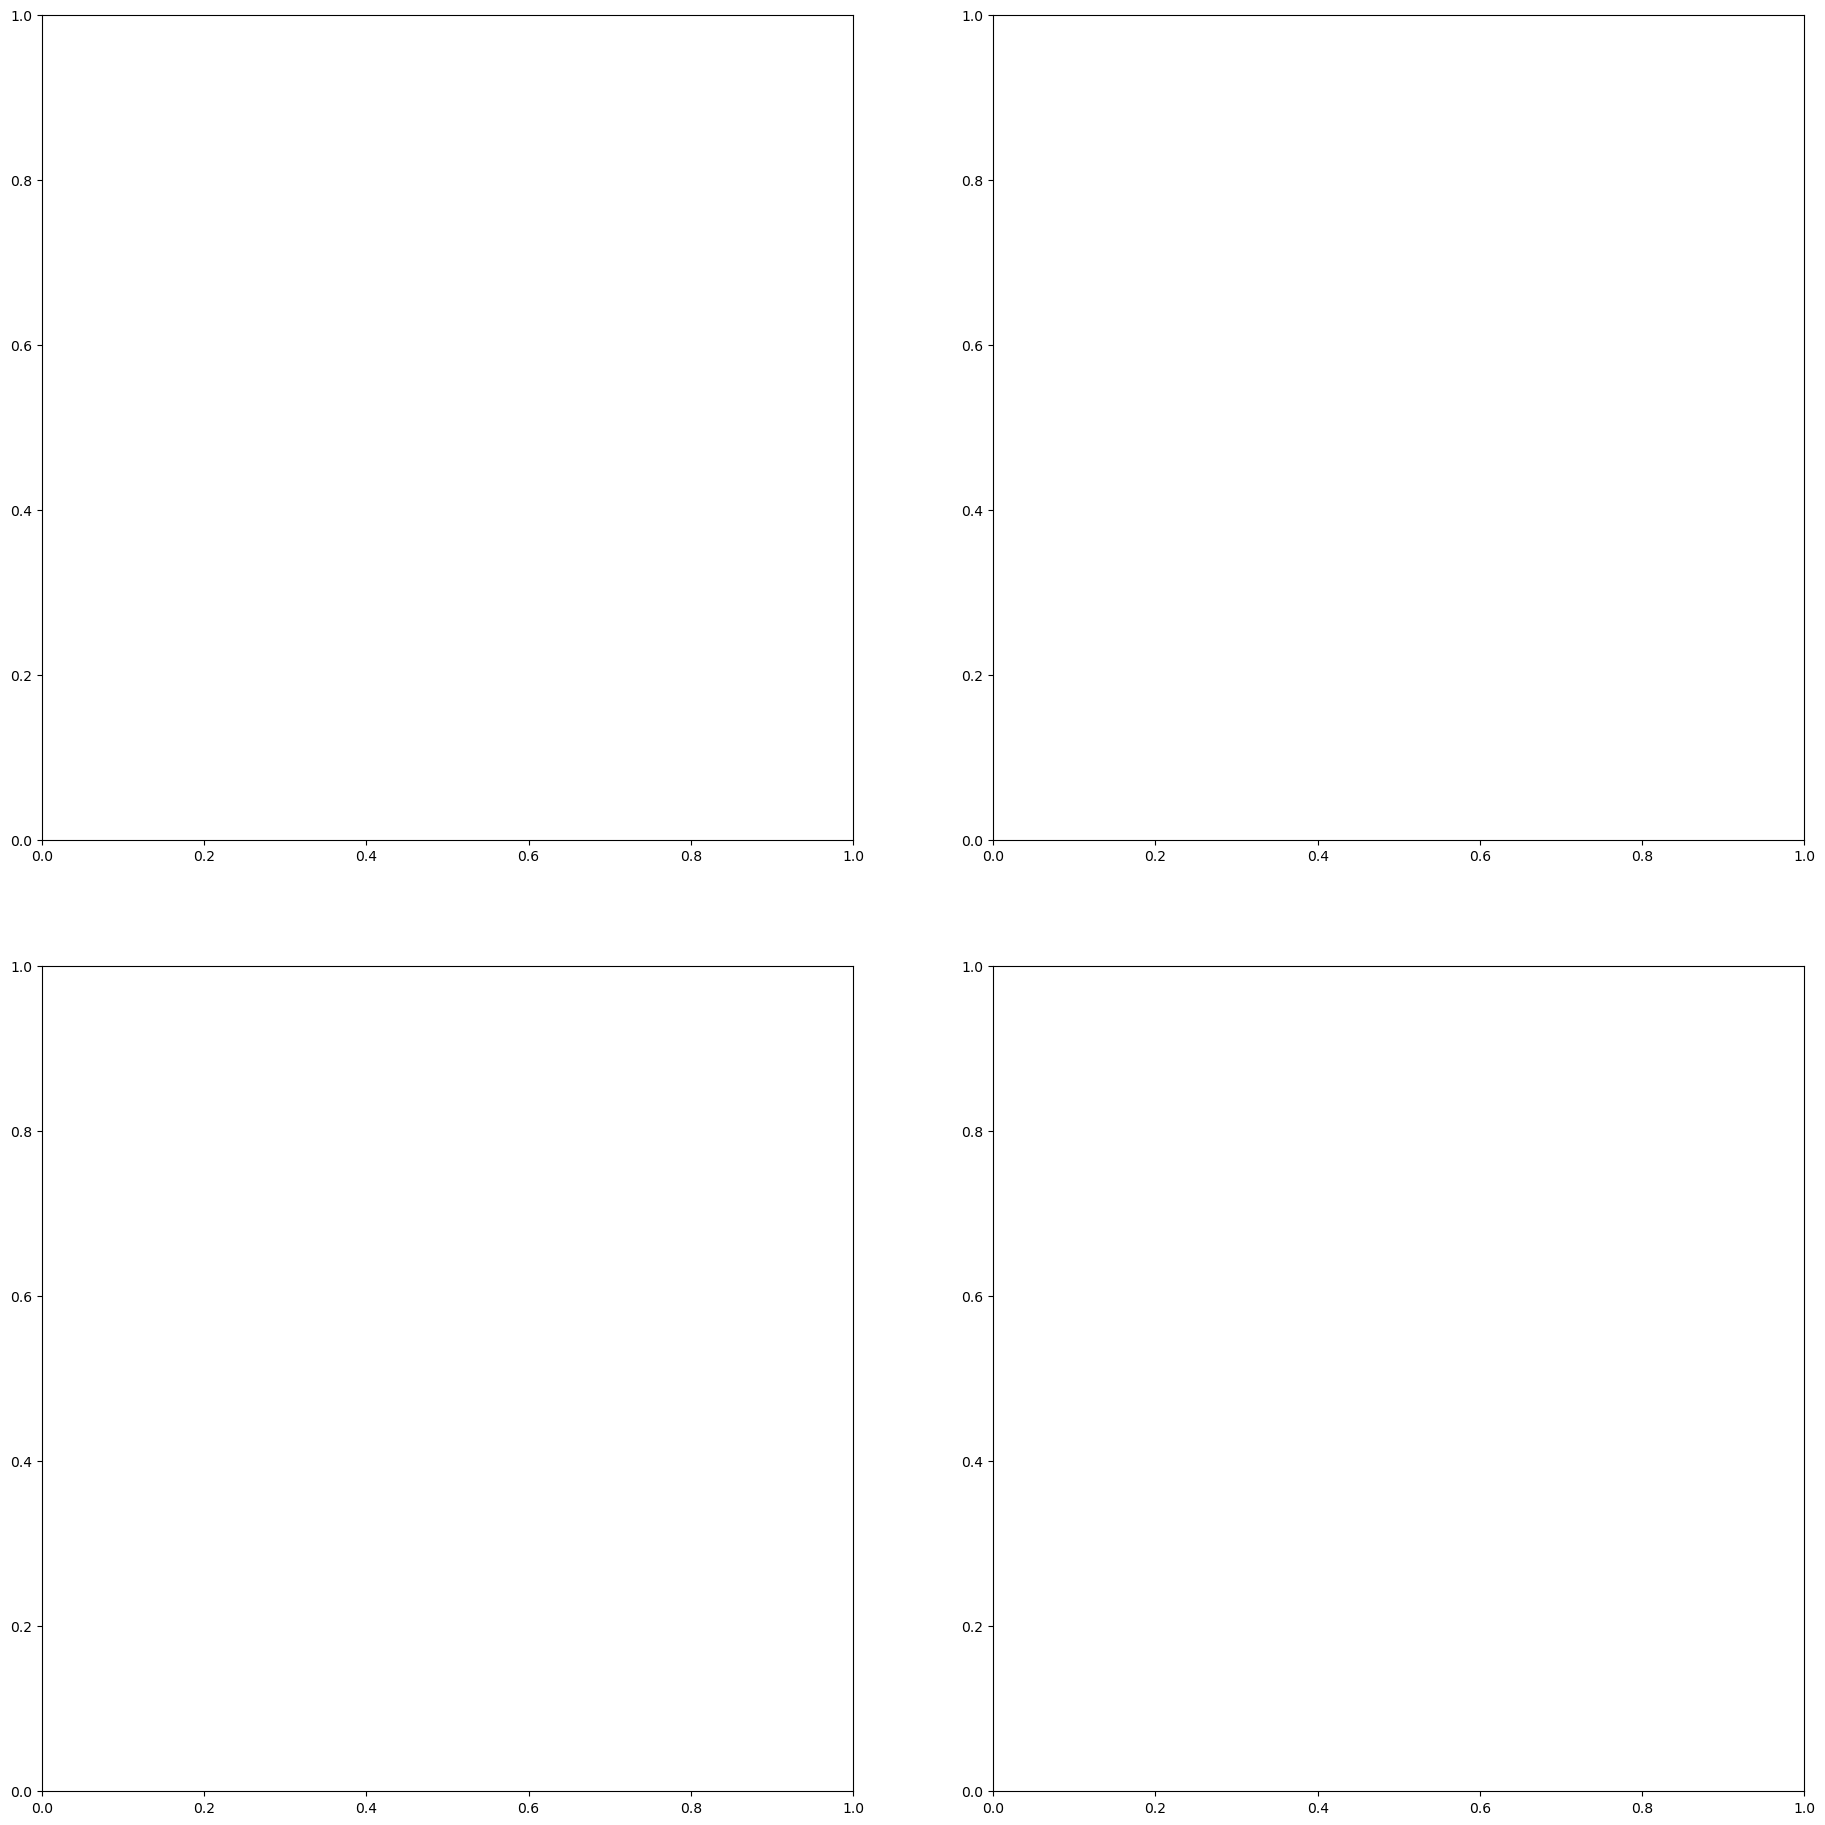

In [ ]:
from matplotlib import pyplot as plt
fsize = 15

fig, ax = plt.subplots(2,2, figsize = ( (20,20)))
fig.tight_layout(pad = 7)

## hM vs Time ## 
ax[0,1].plot(hM_time,hM_nonzero['hM'],color = 'tab:blue')
# ax[0,0].set_xscale('log')
ax[0,1].set_yscale('log')
ax[0,1].set_xlabel( 'time hM is nonzero (s)', fontsize=fsize)
ax[0,1].set_ylabel( 'h(M,$Q^*$) ($GeV^4$)  ', fontsize= fsize)

## hM vs Q ##
ax[0,0].plot(hM_nonzero['Q'],hM_nonzero['hM'],color = 'tab:blue')
# ax[0,0].set_xscale('log')
ax[0,0].set_yscale('log')
ax[0,0].set_xlabel( 'Charge ($Q^*$)', fontsize=fsize)
ax[0,0].set_ylabel( 'h(M,$Q^*$) ($GeV^4$)  ', fontsize= fsize)
ax[0,0].invert_xaxis()

## fM vs Mass ##
ax[1,0].plot(df['Mass'],df['fM'],color = 'tab:orange')
ax[1,0].set_xscale('log')
ax[1,0].set_yscale('log')
ax[1,0].set_xlabel( 'Mass (g)', fontsize=fsize)
ax[1,0].set_ylabel( 'f(M,$Q^*$) ($GeV^4$)  ', fontsize= fsize)
ax[1,0].invert_xaxis()

## fM vs time##
ax[1,1].plot(df['time'].iloc[-1] -df['time'],df['fM'],color = 'tab:orange')
# ax[1,1].set_xscale('log')
ax[1,1].set_yscale('log')
ax[1,1].set_xlabel( 'lifetime remaining (s)', fontsize=fsize)
ax[1,1].set_ylabel( 'f(M,$Q^*$) ($GeV^4$)  ', fontsize= fsize)
ax[1,1].invert_xaxis()

fig.suptitle('M = {} g, $Q^*$ = {}, Geometric Optics Limit'.format(M,Q))

NameError: name 'df' is not defined

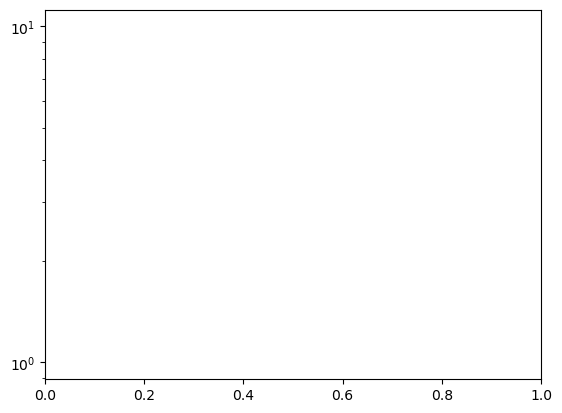

In [14]:
plt.yscale('log')
plt.plot(df['Q'],-df['dQdt'],color = 'tab:orange')
plt.xlabel( 'Q', fontsize=fsize)
plt.ylabel( '-$\\frac{dQ}{dt}$  ', fontsize= fsize)
plt.gca().invert_xaxis()

Analytic_evolution_Q0.1.txt
Analytic_evolution_Q0.2.txt
Analytic_evolution_Q0.3.txt
Analytic_evolution_Q0.4.txt
Analytic_evolution_Q0.5.txt
Analytic_evolution_Q0.6.txt
Analytic_evolution_Q0.7.txt
Analytic_evolution_Q0.8.txt
Analytic_evolution_Q0.9.txt


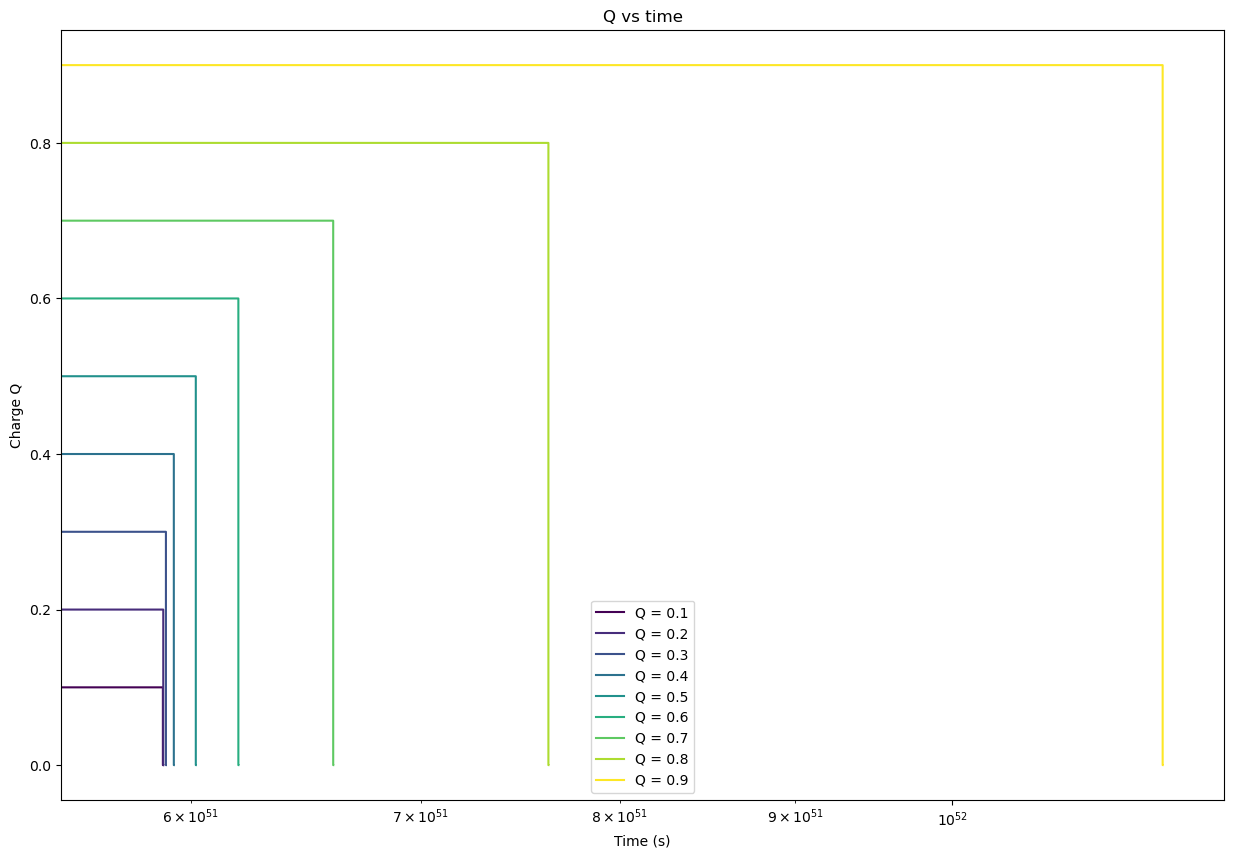

In [15]:
import re

folder_path = './AE_Varying_Q'  # Replace with your folder path
# Get the list of all CSV files in the folder
data_files = [f for f in os.listdir(folder_path) if f.endswith('.txt')]
data_files.sort()
colors = plt.cm.viridis(np.linspace(0, 1, len(data_files)))

# Loop through the data files
for i,file in enumerate(data_files):
    print(file)
    file_path = os.path.join(folder_path, file)
    data = pd.read_csv(file_path,skipinitialspace=True, delimiter =' ' )
    # Assume the data has two columns: 'x' and 'y'
    time = data['time']
    q = data['Q']
    numbers = re.findall(r'\d+\.\d+', file)
    
    # Plot the data on the same figure
    plt.plot(time, q, label= 'Q = {}'.format(numbers[0]), color=colors[ i % len(colors)]) 


# Adding titles and labels
plt.title('Q vs time')
plt.xlabel('Time (s)')
plt.ylabel('Charge Q')
plt.legend()
plt.xlim(5.5e51,1.2e52)
plt.xscale('log')
# plt.yscale('log')
plt.gcf().set_size_inches(15, 10)


Analytic_evolution_Q0.1.txt
Analytic_evolution_Q0.1.txt
Analytic_evolution_Q0.2.txt
Analytic_evolution_Q0.3.txt
Analytic_evolution_Q0.4.txt
Analytic_evolution_Q0.5.txt
Analytic_evolution_Q0.6.txt
Analytic_evolution_Q0.7.txt
Analytic_evolution_Q0.8.txt


(array([1.e-45, 1.e-44, 1.e-43, 1.e-42, 1.e-41, 1.e-40, 1.e-39]),
 [Text(0, 1e-45, '$\\mathdefault{10^{-45}}$'),
  Text(0, 1e-44, '$\\mathdefault{10^{-44}}$'),
  Text(0, 1e-43, '$\\mathdefault{10^{-43}}$'),
  Text(0, 1e-42, '$\\mathdefault{10^{-42}}$'),
  Text(0, 1e-41, '$\\mathdefault{10^{-41}}$'),
  Text(0, 1e-40, '$\\mathdefault{10^{-40}}$'),
  Text(0, 1e-39, '$\\mathdefault{10^{-39}}$')])

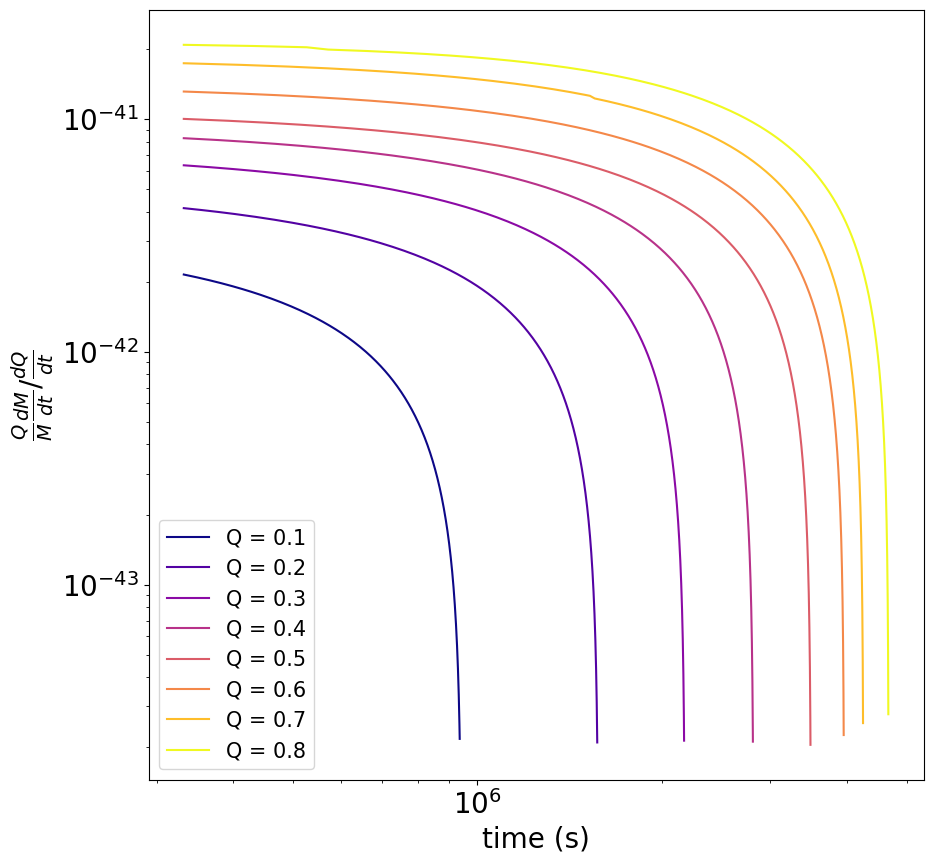

In [61]:

# folder_path = './AE_Varying_Q'  # Replace with your folder path
folder_path = './AE_Varying_Q'  
# Get the list of all CSV files in the folder
data_files = [f for f in os.listdir(folder_path) if f.endswith('.txt')]
data_files.sort()
colors = plt.cm.plasma(np.linspace(0, 1, len(data_files)))
# data_files = data_files
print(data_files[0])
# data_files.sort()
# colors = plt.cm.Spectral(np.linspace(0, 1, len(data_files)))

# Loop through the data files
# for i,file in enumerate(data_files):
#     print(file)
#     file_path = os.path.join(folder_path, file)
#     data = pd.read_csv(file_path,skipinitialspace=True, delimiter =' ' )
#     # Assume the data has two columns: 'x' and 'y'
#     dQdt = data['dQdt']
#     q = data['Q']
#     dMdt =data['dMdt']
#     time = data['time']
#     delta =data['delta_t']
#     numbers = re.findall(r'\d+\.\d+', file)
    
    # Plot the data on the same figure
    # plt.plot(time, np.divide(dQdt,dMdt), label= 'Q = {}'.format(numbers[0]), color=colors[ i % len(colors)]) 

for i,file in enumerate(data_files):
    print(file)
    file_path = os.path.join(folder_path, file)
    data = pd.read_csv(file_path,skipinitialspace=True, delimiter =' ' )
    # Assume the data has two columns: 'x' and 'y'
    q = data['Q']
    dMdt = np.divide(data['dMdt'],data['Mass'])
    # dMdt = data['dMdt']
    time = data['time']
    delta =data['delta_t']
    numbers = re.findall(r'\d+\.\d+', file)
    dQdt = np.divide(data['dQdt'],data['Q'])
    # dQdt = data['dQdt']
    q_change = []
    t_change = []
    d = 0
    for j, a in enumerate(dQdt):
        if a != 0:
            if delta[j] > 1e10:
                q_change.append(dMdt[j]/a)
                t_change.append(d)
                d+= 332306.998946229 
            else:
                q_change.append(dMdt[j]/a)
                t_change.append(d)
                d+= delta[j]
    # print(time[-1])
    # plt.plot(t_change, q_change, label= 'Q = {}'.format(numbers[0]), color=colors[ i % len(colors)]) 
    plt.plot(t_change[1:], q_change[1:], label= 'Q = {}'.format(numbers[0]), color=colors[ i % len(colors)]) 



# for i, a in enumerate(dQdt):
#     q_change = []
#     t_change = []
#     d = 0
#     if a[] != 0:
#         if delta[i] > 1e10:
#             pass
#         else:
#             q_change.append(dMdt[i]/a)
#             t_change.append(d)
#             d+= delta[i]
#     numbers = re.findall(r'\d+\.\d+', file)
#     plt.plot(t_change, q_change, label= 'Q = {}'.format(numbers[0]), color=colors[ i % len(colors)]) 
#     print('poop')
# # Adding titles and labels


# plt.title('$\\frac{Q}{M} \\frac{dM/dt}{dQ/dt}$ vs t')

plt.ylabel('$ \\frac{Q}{M}\\frac{dM}{dt} / \\frac{dQ}{dt}$', fontsize=textsize)
plt.xlabel('time (s)',fontsize=textsize)
plt.legend(fontsize=legendsize)
plt.gcf().set_size_inches(10, 10)
# plt.ylim(0,1.9e-38)
# plt.gca().invert_xaxis()
plt.yscale('log')
plt.xscale('log')
plt.xticks(fontsize=textsize)  # Set x-axis tick font size
plt.yticks(fontsize=textsize) 
# plt.xlim(1e50,4e56)


Analytic_evolution_Q0.1.txt
Analytic_evolution_Q0.2.txt
Analytic_evolution_Q0.3.txt
Analytic_evolution_Q0.4.txt
Analytic_evolution_Q0.5.txt
Analytic_evolution_Q0.6.txt
Analytic_evolution_Q0.7.txt
Analytic_evolution_Q0.8.txt
Analytic_evolution_Q0.9.txt


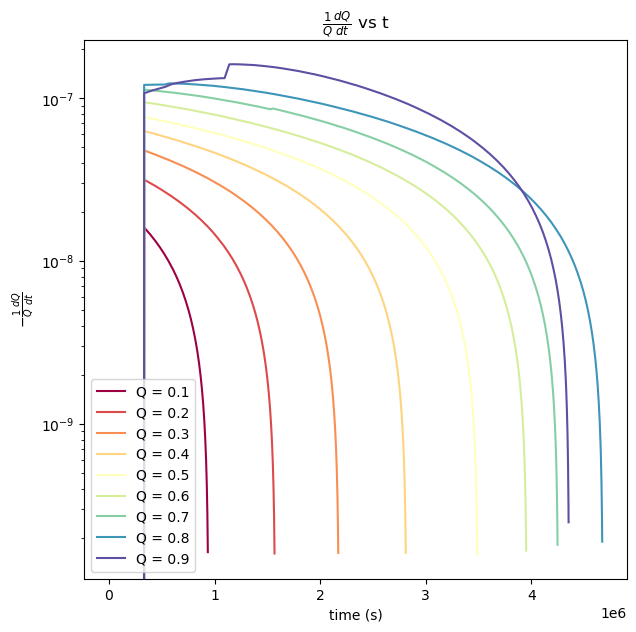

In [17]:

folder_path = './AE_Varying_Q'  
data_files = [f for f in os.listdir(folder_path) if f.endswith('.txt')]
data_files.sort()
colors = plt.cm.Spectral(np.linspace(0, 1, len(data_files)))

for i,file in enumerate(data_files):
    print(file)
    file_path = os.path.join(folder_path, file)
    data = pd.read_csv(file_path,skipinitialspace=True, delimiter =' ' )

    q = data['Q']
    time = data['time']
    delta =data['delta_t']
    numbers = re.findall(r'\d+\.\d+', file)
    dQdt = data['dQdt']
    q_change = []
    t_change = []
    d = 0
    for j, a in enumerate(dQdt):
        if a != 0:
            if delta[j] > 1e10:
                q_change.append(-a/q[j])
                t_change.append(d)
                d+= 332306.998946229 
            else:
                q_change.append(-a*(q[j]))
                t_change.append(d)
                d+= delta[j]

    plt.plot(t_change, q_change, label= 'Q = {}'.format(numbers[0]), color=colors[ i % len(colors)]) 

plt.title('$ \\frac{1}{Q} \\frac{dQ}{dt}$ vs t')

plt.ylabel('$ -\\frac{1}{Q} \\frac{dQ}{dt}$')
plt.xlabel('time (s)')
plt.legend()
plt.gcf().set_size_inches(7, 7)
# plt.ylim(0,1.9e-38)
# plt.gca().invert_xaxis()
plt.yscale('log')
# plt.xscale('log')
# plt.xlim(1e50,4e56)

Analytic_evolution_Q0.1.txt
Analytic_evolution_Q0.2.txt
Analytic_evolution_Q0.3.txt
Analytic_evolution_Q0.4.txt
Analytic_evolution_Q0.5.txt
Analytic_evolution_Q0.6.txt
Analytic_evolution_Q0.7.txt
Analytic_evolution_Q0.8.txt


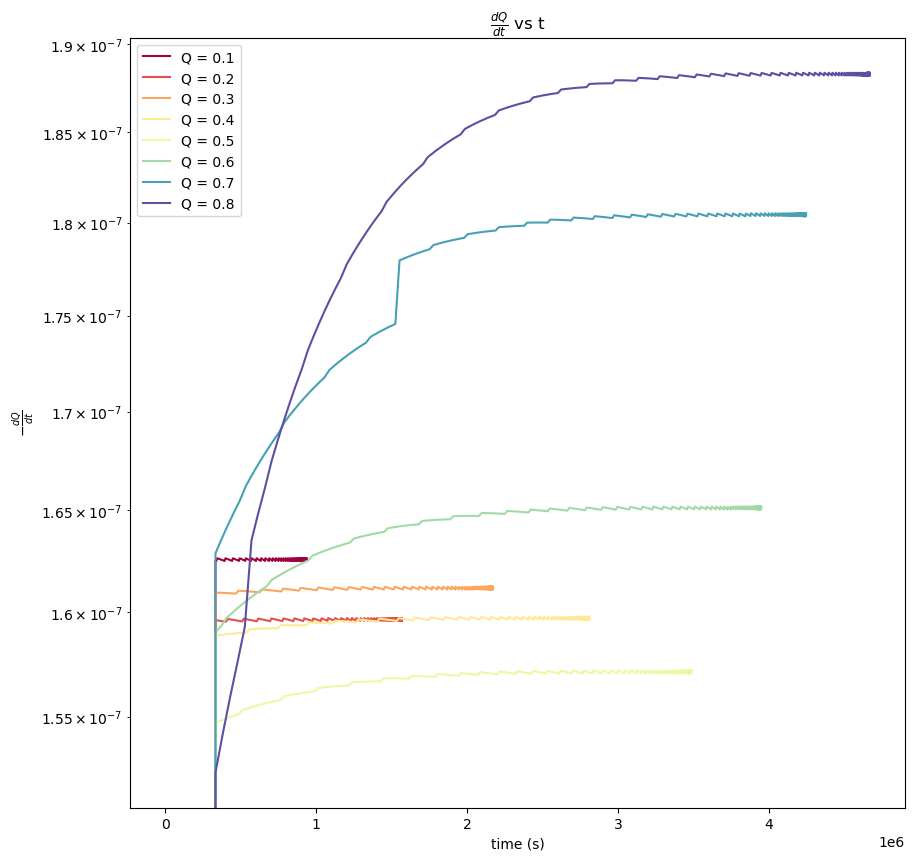

In [70]:
# Approximation seems to break down past 0.9 = Q
folder_path = './AE_Varying_Q'  
data_files = [f for f in os.listdir(folder_path) if f.endswith('.txt')]
data_files.sort()
colors = plt.cm.Spectral(np.linspace(0, 1, len(data_files)))

for i,file in enumerate(data_files):
    print(file)
    file_path = os.path.join(folder_path, file)
    data = pd.read_csv(file_path,skipinitialspace=True, delimiter =' ' )

    q = data['Q']
    time = data['time']
    delta =data['delta_t']
    numbers = re.findall(r'\d+\.\d+', file)
    dQdt = data['dQdt']
    q_change = []
    t_change = []
    d = 0
    for j, a in enumerate(dQdt):
        if a != 0:
            if delta[j] > 1e10:
                q_change.append(-a)
                t_change.append(d)
                d+= 332306.998946229 
            else:
                q_change.append(-a)
                t_change.append(d)
                d+= delta[j]

    plt.plot(t_change, q_change, label= 'Q = {}'.format(numbers[0]), color=colors[ i % len(colors)]) 

plt.title('$ \\frac{dQ}{dt}$ vs t')

plt.ylabel('$ -\\frac{dQ}{dt}$')
plt.xlabel('time (s)')
plt.legend()
plt.gcf().set_size_inches(10, 10)
# plt.ylim(0,1.9e-38)
# plt.gca().invert_xaxis()
plt.yscale('log')
# plt.xscale('log')
# plt.xlim(1e50,4e56)

# Mass vs Time

Analytic_evolution_Q0.1.txt
Analytic_evolution_Q0.2.txt
Analytic_evolution_Q0.3.txt
Analytic_evolution_Q0.4.txt
Analytic_evolution_Q0.5.txt
Analytic_evolution_Q0.6.txt
Analytic_evolution_Q0.7.txt
Analytic_evolution_Q0.8.txt
Analytic_evolution_Q0.9.txt


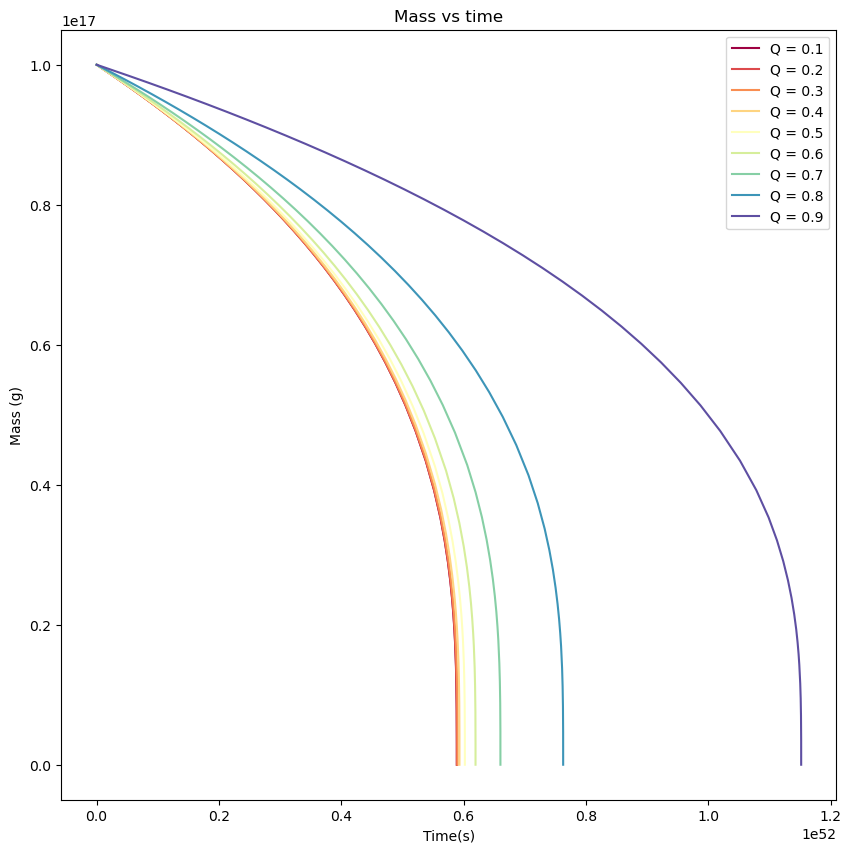

In [19]:

folder_path = './AE_Varying_Q'  # Replace with your folder path
# Get the list of all CSV files in the folder
data_files = [f for f in os.listdir(folder_path) if f.endswith('.txt')]
data_files.sort()
colors = plt.cm.Spectral(np.linspace(0, 1, len(data_files)))

# Loop through the data files
for i,file in enumerate(data_files):
    print(file)
    file_path = os.path.join(folder_path, file)
    data = pd.read_csv(file_path,skipinitialspace=True, delimiter =' ' )
    # Assume the data has two columns: 'x' and 'y'
    mass = data['Mass']
    time = data['time']
    numbers = re.findall(r'\d+\.\d+', file)
    
    # Plot the data on the same figure
    plt.plot(time, mass, label= 'Q = {}'.format(numbers[0]), color=colors[ i % len(colors)]) 


# Adding titles and labels
plt.title('Mass vs time')

plt.ylabel('Mass (g)')
plt.xlabel('Time(s)')
# plt.yscale('log')
# plt.xscale('log')
plt.legend()
plt.gcf().set_size_inches(10, 10)




Analytic_evolution_Q0.1.txt
Analytic_evolution_Q0.2.txt
Analytic_evolution_Q0.3.txt
Analytic_evolution_Q0.4.txt
Analytic_evolution_Q0.5.txt
Analytic_evolution_Q0.6.txt
Analytic_evolution_Q0.7.txt
Analytic_evolution_Q0.8.txt


(array([1.e-54, 1.e-53, 1.e-52, 1.e-51, 1.e-50, 1.e-49, 1.e-48, 1.e-47,
        1.e-46]),
 [Text(0, 1e-54, '$\\mathdefault{10^{-54}}$'),
  Text(0, 1e-53, '$\\mathdefault{10^{-53}}$'),
  Text(0, 1e-52, '$\\mathdefault{10^{-52}}$'),
  Text(0, 1e-51, '$\\mathdefault{10^{-51}}$'),
  Text(0, 1e-50, '$\\mathdefault{10^{-50}}$'),
  Text(0, 1e-49, '$\\mathdefault{10^{-49}}$'),
  Text(0, 1e-48, '$\\mathdefault{10^{-48}}$'),
  Text(0, 1e-47, '$\\mathdefault{10^{-47}}$'),
  Text(0, 1e-46, '$\\mathdefault{10^{-46}}$')])

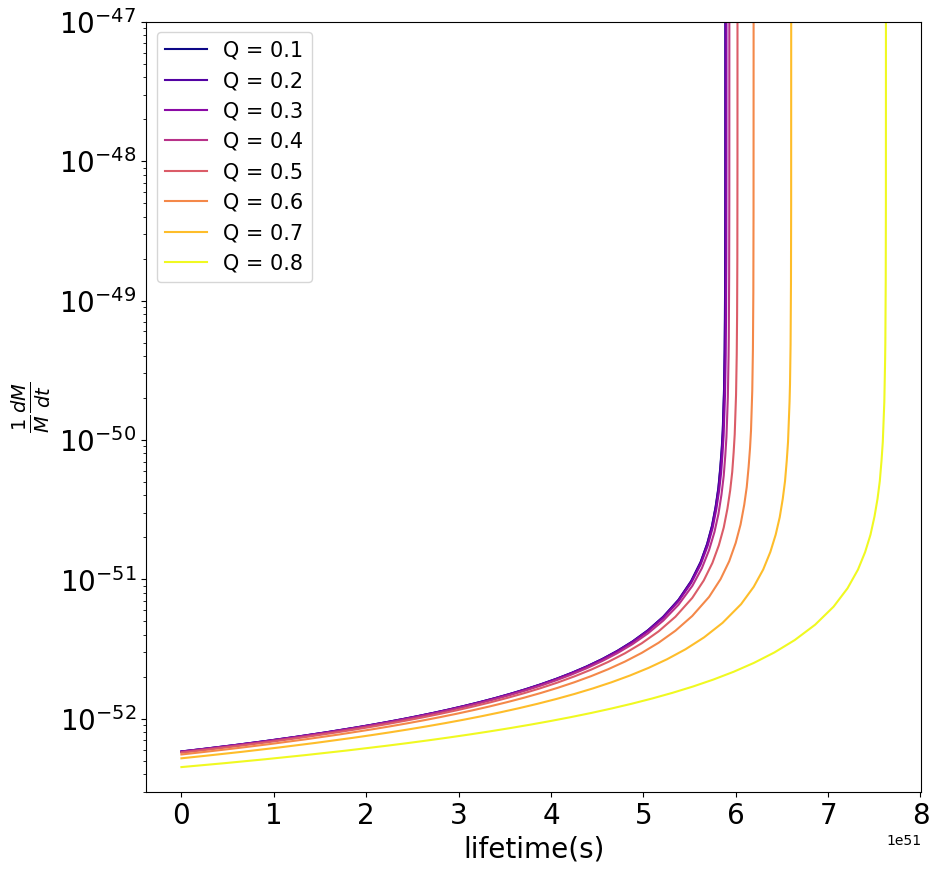

In [85]:

folder_path = './AE_Varying_Q'  # Replace with your folder path
# Get the list of all CSV files in the folder
data_files = [f for f in os.listdir(folder_path) if f.endswith('.txt')]
data_files.sort()
colors = plt.cm.plasma(np.linspace(0, 1, len(data_files)))

# Loop through the data files
for i,file in enumerate(data_files):
    print(file)
    file_path = os.path.join(folder_path, file)
    data = pd.read_csv(file_path,skipinitialspace=True, delimiter =' ' )
    # Assume the data has two columns: 'x' and 'y'
    dMdt = -data['dMdt']
    mass = data['Mass']
    time = data['time']
    numbers = re.findall(r'\d+\.\d+', file)
    
    # Plot the data on the same figure
    plt.plot(time, np.divide(dMdt,mass), label= 'Q = {}'.format(numbers[0]), color=colors[ i % len(colors)]) 


# Adding titles and labels
# plt.title('$\\frac{1}{M}\\frac{dM}{dt}$ vs time')

plt.ylabel('$\\frac{1}{M}\\frac{dM}{dt}$',fontsize=textsize)
plt.xlabel('lifetime(s)',fontsize=textsize)
plt.yscale('log')
# plt.xscale('log')
plt.legend(fontsize=legendsize)
plt.ylim(3e-53,1e-47)
plt.gcf().set_size_inches(10, 10)
plt.xticks(fontsize=textsize)  # Set x-axis tick font size
plt.yticks(fontsize=textsize) 

Analytic_evolution_Q0.1.txt
Analytic_evolution_Q0.2.txt
Analytic_evolution_Q0.3.txt
Analytic_evolution_Q0.4.txt
Analytic_evolution_Q0.5.txt
Analytic_evolution_Q0.6.txt
Analytic_evolution_Q0.7.txt
Analytic_evolution_Q0.8.txt
Analytic_evolution_Q0.9.txt


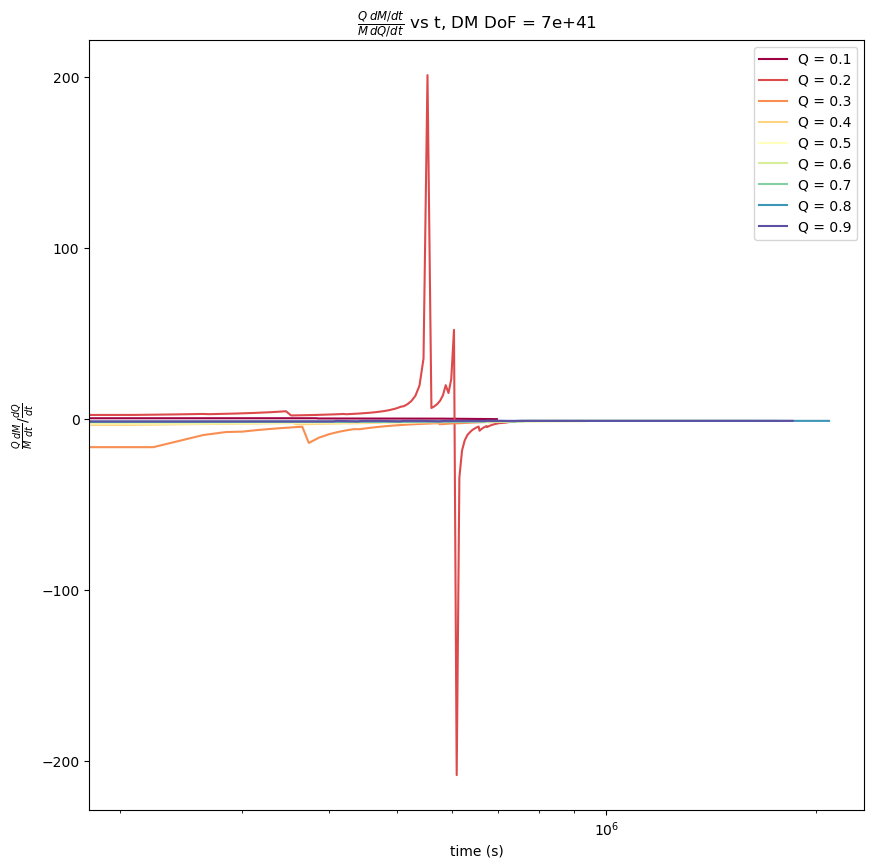

In [21]:

folder_path = './DS'  # Replace with your folder path
# Get the list of all CSV files in the folder
data_files = [f for f in os.listdir(folder_path) if f.endswith('.txt')]
data_files.sort()
colors = plt.cm.Spectral(np.linspace(0, 1, len(data_files)))

# Loop through the data files
# for i,file in enumerate(data_files):
#     print(file)
#     file_path = os.path.join(folder_path, file)
#     data = pd.read_csv(file_path,skipinitialspace=True, delimiter =' ' )
#     # Assume the data has two columns: 'x' and 'y'
#     dQdt = data['dQdt']
#     q = data['Q']
#     dMdt =data['dMdt']
#     time = data['time']
#     delta =data['delta_t']
#     numbers = re.findall(r'\d+\.\d+', file)
    
    # Plot the data on the same figure
    # plt.plot(time, np.divide(dQdt,dMdt), label= 'Q = {}'.format(numbers[0]), color=colors[ i % len(colors)]) 

for i,file in enumerate(data_files):
    print(file)
    file_path = os.path.join(folder_path, file)
    data = pd.read_csv(file_path,skipinitialspace=True, delimiter =' ' )
    # Assume the data has two columns: 'x' and 'y'
    q = data['Q']
    dMdt = np.divide(data['dMdt'],data['Mass'])
    # dMdt = data['dMdt']
    time = data['time']
    delta =data['delta_t']
    numbers = re.findall(r'\d+\.\d+', file)
    dQdt = np.divide(data['dQdt'],data['Q'])
    # dQdt = data['dQdt']
    q_change = []
    t_change = []
    d = 0
    for j, a in enumerate(dQdt):
        if a != 0:
            if delta[j] > 1e10:
                q_change.append(dMdt[j]/a)
                t_change.append(d)
                d+= 332306.998946229 
            else:
                q_change.append(dMdt[j]/a)
                t_change.append(d)
                d+= delta[j]
    # print(time[-1])
    plt.plot(t_change, q_change, label= 'Q = {}'.format(numbers[0]), color=colors[ i % len(colors)]) 



# for i, a in enumerate(dQdt):
#     q_change = []
#     t_change = []
#     d = 0
#     if a[] != 0:
#         if delta[i] > 1e10:
#             pass
#         else:
#             q_change.append(dMdt[i]/a)
#             t_change.append(d)
#             d+= delta[i]
#     numbers = re.findall(r'\d+\.\d+', file)
#     plt.plot(t_change, q_change, label= 'Q = {}'.format(numbers[0]), color=colors[ i % len(colors)]) 
#     print('poop')
# # Adding titles and labels


plt.title('$\\frac{Q}{M} \\frac{dM/dt}{dQ/dt }$ vs t' + ", DM DoF = {}".format(dm_dof) )

plt.ylabel('$ \\frac{Q}{M}\\frac{dM}{dt} / \\frac{dQ}{dt}$')
plt.xlabel('time (s)')
plt.legend()
plt.gcf().set_size_inches(10, 10)
# plt.ylim(0,1.9e-38)
# plt.gca().invert_xaxis()
# plt.yscale('log')
plt.xscale('log')
# plt.xlim(1e50,4e56)


In [22]:
def align_lists_to_longest(lists, fill_value= 'NaN'):

    # Find the maximum length
    max_length = max(len(lst) for lst in lists)
    
    # Extend each list to match the maximum length
    aligned_lists = [[fill_value] * (max_length - len(lst)) + lst for lst in lists]

    return aligned_lists

def match_and_pad_lists(lists, fill_value=0):

    # Find the maximum length among all lists
    max_length = max(len(lst) for lst in lists)
    
    # Pad each list to match the maximum length, aligning their starting points
    padded_lists = [
        lst + [fill_value] * (max_length - len(lst)) for lst in lists
    ]
    
    return padded_lists


def longest_list(lists):
    if not lists:
        return None  # Handle empty input gracefully
# Find and return the list with the most entries
    return max(lists, key=len)



DS_dof_1e+50.txt
DS_dof_1e+60.txt
DS_dof_1e+70.txt
DS_dof_1e+80.txt


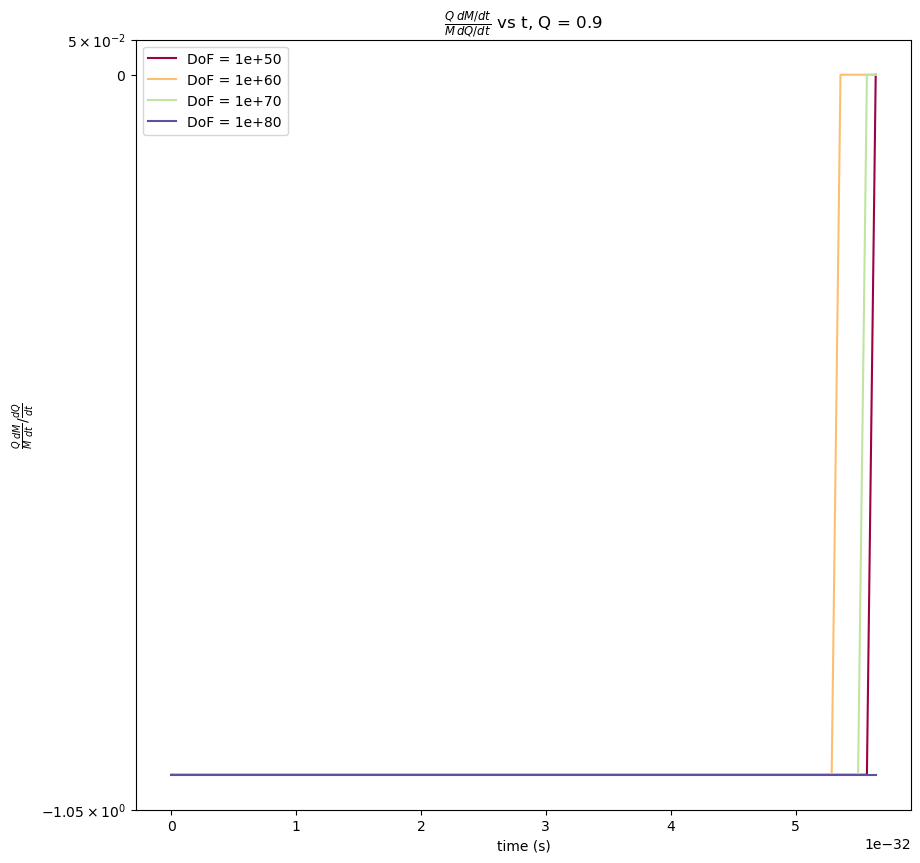

In [23]:

folder_path = './DS_dof/OLD/mass_dom'  # Replace with your folder path
# Get the list of all CSV files in the folder
data_files = [f for f in os.listdir(folder_path) if f.endswith('.txt')]
data_files.sort()
colors = plt.cm.Spectral(np.linspace(0, 1, len(data_files)))
q_dict = {}
t_dict = {}
numbers = []

for i,file in enumerate(data_files):

    list_name = f"list_{i}"  # Generate a name like "list_0", "list_1", etc.
    q_dict[list_name] = []  # Create an empty list with this name
    t_dict[list_name] = [] 
    # Access or update lists  # Add 1 to the first list

    print(file)
    file_path = os.path.join(folder_path, file)
    data = pd.read_csv(file_path,skipinitialspace=True, delimiter =' ' )
    # Assume the data has two columns: 'x' and 'y'
    q = data['Q']
    dMdt = np.divide(data['dMdt'],data['Mass'])
    # dMdt = data['dMdt']
    time = data['time']
    delta =data['delta_t']
    numbers.extend(re.findall(r'\d+\.?\d*[eE][+-]?\d+', file))
    dQdt = np.divide(data['dQdt'],data['Q'])
    # dQdt = data['dQdt']
    q_change = []
    t_change = []
    d = 0
    for j, a in enumerate(dQdt):
        if a != 0:
            if delta[j] > 1e10:
                q_change.append(dMdt[j]/a)
                t_change.append(d)
                d+= 332306.998946229 
            else:
                q_change.append(dMdt[j]/a)
                t_change.append(d)
                d+= delta[j]
    q_dict["list_{}".format(i)].extend(q_change)
    t_dict["list_{}".format(i)].extend(t_change)

    # print(time[-1])
    # plt.plot(t_change, q_change, label= 'DoF = {}'.format(numbers[0]), color=colors[ i % len(colors)]) x
q_lists = [value for value in q_dict.values() if isinstance(value, list)]
t_lists = [value for value in t_dict.values() if isinstance(value, list)]

extended_lists =  match_and_pad_lists(q_lists)
max_time = longest_list(t_lists)
delta_t = max_time[-1]-max_time[-2]

for i,lists in enumerate(extended_lists):
    plt.plot(np.linspace(0,max_time[-1],len(max_time)), lists, color=colors[ i % len(colors)],label= 'DoF = {}'.format(numbers[i]))


plt.title('$\\frac{Q}{M} \\frac{dM/dt}{dQ/dt }$ vs t' + ", Q = 0.9".format(dm_dof) )

plt.ylabel('$ \\frac{Q}{M}\\frac{dM}{dt} / \\frac{dQ}{dt}$')
plt.xlabel('time (s)')
plt.legend()
plt.gcf().set_size_inches(10, 10)
# plt.ylim(0,1.9e-38)
# plt.gca().invert_xaxis()
plt.yscale('symlog')
# plt.xscale('log')
# plt.xlim(1e50,4e56)


In [25]:

folder_path = './DS_dof/mass_dom'  # Replace with your folder path
# Get the list of all CSV files in the folder
data_files = [f for f in os.listdir(folder_path) if f.endswith('.txt')]
data_files.sort()
colors = plt.cm.Spectral(np.linspace(0, 1, len(data_files)))
q_dict = {}
t_dict = {}
numbers = []

for i,file in enumerate(data_files):

    list_name = f"list_{i}"  # Generate a name like "list_0", "list_1", etc.
    q_dict[list_name] = []  # Create an empty list with this name
    t_dict[list_name] = [] 
    # Access or update lists  # Add 1 to the first list

    print(file)
    file_path = os.path.join(folder_path, file)
    data = pd.read_csv(file_path,skipinitialspace=True, delimiter =' ' )
    # Assume the data has two columns: 'x' and 'y'
    q = data['Q']
    dMdt = np.divide(data['dMdt'],data['Mass'])
    # dMdt = data['dMdt']
    time = data['time']
    delta =data['delta_t']
    numbers.extend(re.findall(r'\d+\.?\d*[eE][+-]?\d+', file))
    dQdt = np.divide(data['dQdt'],data['Q'])
    # dQdt = data['dQdt']
    q_change = []
    t_change = []
    d = 0
    for j, a in enumerate(dQdt):
        if a != 0:
            if delta[j] > 1e10:
                q_change.append(dMdt[j]/a)
                t_change.append(d)
                d+= 332306.998946229 
            else:
                q_change.append(dMdt[j]/a)
                t_change.append(d)
                d+= delta[j]
    q_dict["list_{}".format(i)].extend(q_change)
    t_dict["list_{}".format(i)].extend(t_change)

    # print(time[-1])
    # plt.plot(t_change, q_change, label= 'DoF = {}'.format(numbers[0]), color=colors[ i % len(colors)]) x
q_lists = [value for value in q_dict.values() if isinstance(value, list)]
t_lists = [value for value in t_dict.values() if isinstance(value, list)]

extended_lists =  match_and_pad_lists(q_lists)
max_time = longest_list(t_lists)
delta_t = max_time[-1]-max_time[-2]

print(len(numbers))
for i,lists in enumerate(q_lists):

    plt.plot(lists, color=colors[ i % len(colors)],label= 'DoF = {}'.format(numbers[i]))


plt.title('$\\frac{Q}{M} \\frac{dM/dt}{dQ/dt }$ vs t' + ", Q = 0.9".format(dm_dof) )

plt.ylabel('$ \\frac{Q}{M}\\frac{dM}{dt} / \\frac{dQ}{dt}$')
plt.xlabel('time (s)')
plt.legend()
plt.gcf().set_size_inches(10, 10)
# plt.ylim(0,1.9e-38)
# plt.gca().invert_xaxis()
plt.yscale('symlog')
plt.xscale('log')
# plt.xlim(1e50,4e56)


FileNotFoundError: [Errno 2] No such file or directory: './DS_dof/mass_dom'

# Varying DM Masses, DoF

[0, 14091.76056888646, 28183.52113777292, 42275.281706659385, 56367.04227554584, 70458.8028444323, 84550.56341331876, 98642.32398220521, 112734.08455109167, 125544.77597735208, 138355.4674036125, 151166.15882987293, 163976.85025613336, 176787.54168239378, 189598.2331086542, 202408.92453491464, 215219.61596117506, 228030.3073874355, 240840.99881369591, 253651.69023995634, 266462.38166621677, 279273.07309247716, 290919.15620725934, 302565.2393220415, 314211.3224368237, 325857.40555160586, 337503.48866638803, 349149.5717811702, 360795.6548959524, 372441.73801073455, 384087.8211255167, 395733.9042402989, 407379.9873550811, 419026.07046986325, 430672.1535846454, 442318.2366994276, 453964.31981420977, 465610.40292899194, 474360.27754565777, 483110.1521623236, 491860.0267789894, 500609.90139565524, 508564.3328653514, 516518.76433504757, 524473.1958047438, 532427.62727444, 540382.0587441362, 548336.4902138325, 556290.9216835287, 564245.3531532249, 572199.7846229211, 580154.2160926174, 588108.6

(100000.0, 5000000.0)

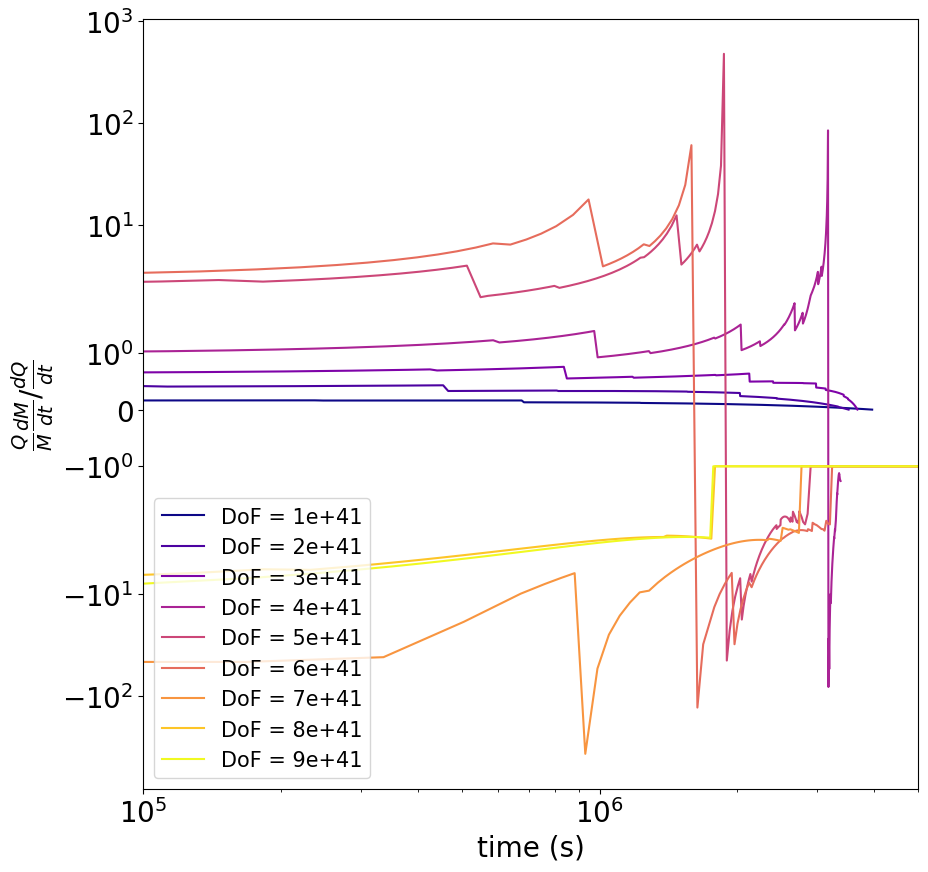

In [86]:
from matplotlib.ticker import PercentFormatter
folder_path = './DS_dof/OLD/1e41'  # Replace with your folder path
# Get the list of all CSV files in the folder
data_files = [f for f in os.listdir(folder_path) if f.endswith('.txt')]
data_files.sort()
colors = plt.cm.plasma(np.linspace(0, 1, len(data_files)))
q_dict = {}
t_dict = {}
numbers = []

for i,file in enumerate(data_files):

    list_name = f"list_{i}"  # Generate a name like "list_0", "list_1", etc.
    q_dict[list_name] = []  # Create an empty list with this name
    t_dict[list_name] = [] 

    file_path = os.path.join(folder_path, file)
    data = pd.read_csv(file_path,skipinitialspace=True, delimiter =' ' )
    q = data['Q']
    dMdt = np.divide(data['dMdt'],data['Mass'])
    # dMdt = data['dMdt']
    time = data['time']
    delta = data['delta_t']
    numbers.extend(re.findall(r'\d+\.?\d*[eE][+-]?\d+', file))
    dQdt = np.divide(data['dQdt'],data['Q'])
    # dQdt = data['dQdt']
    q_change = []
    t_change = []
    lifetime = data['time'].iloc[-1]

    d = 0
    k = 0
    for j, a in enumerate(dQdt):
        if dQdt[j] == 0:
            pass

        else:
            if k == 0:
                k+=1
                # d += data['time'][j]
                pass
            else:
                

                q_change.append(dMdt[j]/a)
                t_change.append(d)
                d += delta[j]
    # t_change = [m/lifetime for m in t_change]

    q_dict["list_{}".format(i)].extend(q_change)
    t_dict["list_{}".format(i)].extend(t_change)

q_lists = [value for value in q_dict.values() if isinstance(value, list)]
t_lists = [value for value in t_dict.values() if isinstance(value, list)]

extended_lists =  match_and_pad_lists(q_lists)
max_time = longest_list(t_lists)
delta_t = max_time[-1]-max_time[-2]

print(t_lists[1])
for i,lists in enumerate(q_lists):
    # print("list_{}".format(i))
    plt.plot(t_lists[i],lists, color=colors[ i % len(colors)],label= 'DoF = {}'.format(numbers[i]))


# plt.title('$\\frac{Q}{M} \\frac{dM/dt}{dQ/dt }$ vs t' + ", Q = 0.9".format(dm_dof) )
plt.ylabel('$ \\frac{Q}{M}\\frac{dM}{dt} / \\frac{dQ}{dt}$', fontsize=textsize)
plt.xlabel('time (s)', fontsize=textsize )
plt.legend( fontsize=legendsize )
plt.gcf().set_size_inches(10, 10)
# plt.ylim(0,1.9e-38)
# plt.gca().invert_xaxis()
plt.yscale('symlog')
plt.xscale('log')
plt.xticks(fontsize=textsize)  # Set x-axis tick font size
plt.yticks(fontsize=textsize) 
# plt.gca().xaxis.set_major_formatter(PercentFormatter(xmax=100))
plt.xlim(1e5,5e6)

In [27]:
def extract_number(filename):
    match = re.search(r"(\d+e[+-]?\d+)", filename)  # Find pattern like "1e+5"
    return float(match.group()) if match else 0  # Convert to float for sorting

# Sort filenames by extracted number in descending order


In [1]:
from matplotlib.ticker import PercentFormatter
import math as ma
folder_path = ['./DS_dof/OLD/MDM_0e+0','./DS_dof/OLD/MDM_1e-4','./DS_dof/OLD/MDM_2e-4','./DS_dof/OLD/MDM_3e-4', './DS_dof/OLD/MDM_5e-4','./DS_dof/OLD/MDM_8e-4','./DS_dof/OLD/MDM_1e-3','./DS_dof/OLD/MDM_1.2e-3','./DS_dof/OLD/MDM_2e-3', './DS_dof/OLD/MDM_3e-3'] 
# folder_path = ['./DS_dof/MDM_0.0e+0', './DS_dof/MDM_1e-3'] 

file_dict = {}
for i, folder in enumerate(folder_path):
    file_name = "data_folder_{}".format(i)
    data_files = [f for f in os.listdir(folder) if f.endswith('.txt')]
    data_files = sorted(data_files, key=extract_number, reverse=True)
    file_dict[file_name] = data_files


# Get the list of all CSV files in the folder


colors = plt.cm.plasma(np.linspace(0, 1, len(folder_path)))

numbers = []


for j, dic in enumerate(file_dict):
    q_max = []
    t_max = []

    for i,file in enumerate(file_dict[dic]):
        file_path = str(os.path.join(folder_path[j], file))

        data = pd.read_csv(file_path,skipinitialspace=True, delimiter =' ' )
        q = data['Q']
        dMdt = np.divide(data['dMdt'],data['Mass'])
        # dMdt = data['dMdt']
        time = data['time']
        delta = data['delta_t']
        dQdt = np.divide(data['dQdt'],data['Q'])
        # dQdt = data['dQdt']
        q_change = []
        t_change = []
        lifetime = data['time'].iloc[-1]

        d=0
        for k, a in enumerate(dQdt):
            q_change.append(dMdt[k]/a)
            # t_change.append(np.divide(d,lifetime))
            t_change.append(d)
            d+= delta[k]
            
        q_max.append(max(q_change))
        index = q_change.index(max(q_change))
        t_max.append(t_change[index])


    extended_lists =  match_and_pad_lists(q_lists)
    max_time = longest_list(t_lists)
    delta_t = max_time[-1]-max_time[-2]

    numbers.extend(re.findall(r"[-+]?\d*\.?\d+e[-+]?\d+", folder_path[j]))
    print(t_max)

    # plt.plot(t_max,q_max, color=colors[j],label= '$m_{DM}$'+' = {} GeV'.format(numbers[j]), linestyle = 'none', marker = '.' )
    plt.plot(t_max,q_max, color=colors[j],label= '$m_{DM}$'+' = {} GeV'.format(numbers[j]) )



# plt.title('$\\frac{Q}{M} \\frac{dM/dt}{dQ/dt }$ vs t' + ", Q = 0.9".format(dm_dof)+', $\mathcal{M}$ = 1e17 g ' )
plt.ylabel('$ \\frac{Q}{M}\\frac{dM}{dt} / \\frac{dQ}{dt}$', fontsize=textsize )
plt.xlabel('lifetime (s)', fontsize=textsize )
plt.legend(fontsize=legendsize)
plt.gcf().set_size_inches(11, 10)
# plt.ylim(0,1.9e-38)
# plt.gca().invert_xaxis()
plt.xticks(fontsize=textsize)  # Set x-axis tick font size
plt.yticks(fontsize=textsize) 
plt.yscale('log')
plt.xscale('log')
# plt.gca().xaxis.set_major_formatter(PercentFormatter(xmax=100))
# plt.xlim(1e50,4e56)


NameError: name 'os' is not defined